# Problem Statement:
Pick up the following stocks and generate forecasts accordingly
Stocks:
1. NASDAQ.AAPL
2. NASDAQ.ADP
3. NASDAQ.CBOE
4. NASDAQ.CSCO
5. NASDAQ.EBAY

# Import all the packages needed for time series

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA, ARMAResults 
import datetime
import sys
import seaborn as sns
import statsmodels
import statsmodels.stats.diagnostic as diag
from statsmodels.tsa.stattools import adfuller
from scipy.stats.mstats import normaltest
from matplotlib.pyplot import acorr 
plt.style.use('fivethirtyeight')
%matplotlib inline

# Read the stock csv and print the data

In [2]:
df = pd.read_csv("data_stocks.csv")

In [3]:
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


# Get only the stocks needed with date

In [57]:
df = df[["DATE", "NASDAQ.AAPL", "NASDAQ.ADP", "NASDAQ.CBOE", "NASDAQ.CSCO", "NASDAQ.EBAY"]]

In [5]:
df.shape

(41266, 6)

# Convert the date with time series and print it

In [6]:
df["DATE_org"]=df["DATE"].apply(lambda x:datetime.datetime.fromtimestamp(x).strftime("%Y-%m-%d %H:%M:%S"))

In [8]:
df.head()

,DATE,NASDAQ.AAPL,NASDAQ.ADP,NASDAQ.CBOE,NASDAQ.CSCO,NASDAQ.EBAY,DATE_org
0,1491226200,143.6800,102.2300,81.03,33.7400,33.3975,2017-04-03 19:00:00
1,1491226260,143.7000,102.1400,81.21,33.8800,33.3950,2017-04-03 19:01:00
2,1491226320,143.6901,102.2125,81.21,33.9000,33.4100,2017-04-03 19:02:00
3,1491226380,143.6400,102.1400,81.13,33.8499,33.3350,2017-04-03 19:03:00
4,1491226440,143.6600,102.0600,81.12,33.8400,33.4000,2017-04-03 19:04:00


In [7]:
import statsmodels.api as sm

# 1. EBAY Stock
# Run the durbin watson for EBAY stock and check for co-relation

In [10]:
sm.stats.durbin_watson(df["NASDAQ.EBAY"])

4.454193967916495e-07

# Plot the line graph for EBAY stock

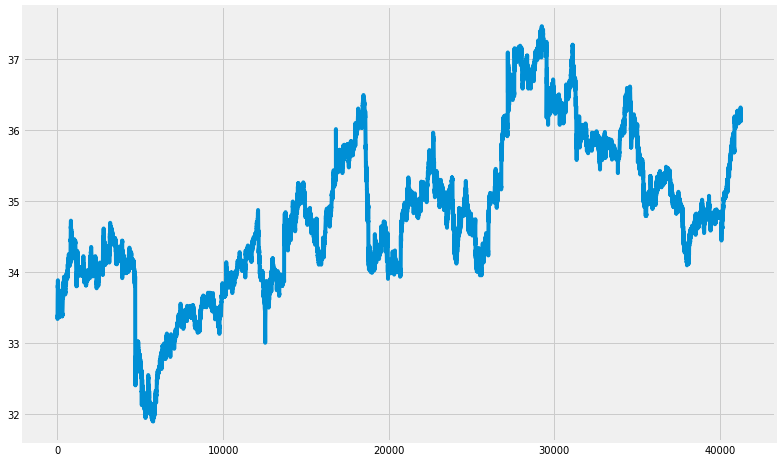

In [9]:
df["NASDAQ.EBAY"].plot(figsize=(12,8));

# plot the auot-correlation and partial auto correlation of EBAY stock

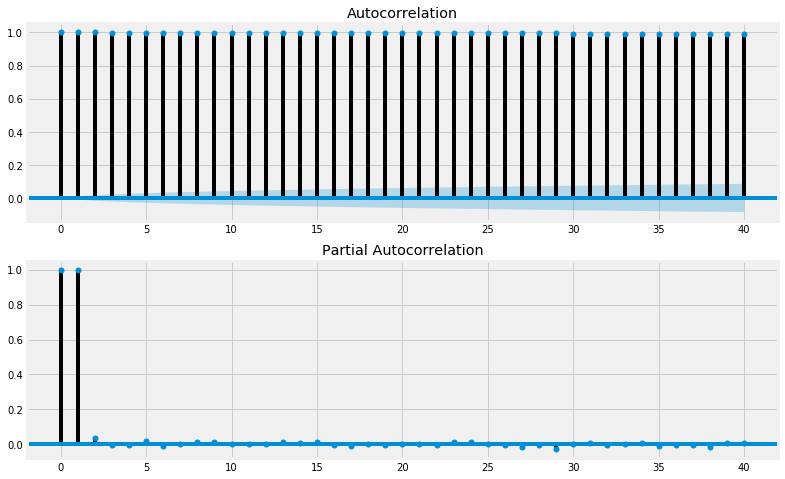

In [11]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df["NASDAQ.EBAY"].values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df["NASDAQ.EBAY"], lags=40, ax=ax2)

#  Check the p,d and q value for EBAY stock with different ranges

In [12]:
arr = np.log(df["NASDAQ.EBAY"].values)
for p in range(3):
    for d in range(1,2):
        for q in range(3):
            try:
                model= ARIMA(arr,(p,d,q)).fit()
                print("model",p,d,q, model.aic, model.bic, model.hqic)
            except:
                pass


C:\Users\chinnu\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\chinnu\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\chinnu\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)

model 0 1 0 -486538.7533912184 -486521.4978512943 -486533.2995096858
model 0 1 1 -486602.16899928125 -486576.28568939515 -486593.9881769824
model 0 1 2 -486602.6289060174 -486568.1178261693 -486591.7211429523
model 1 1 0 -486603.1022564465 -486577.2189465604 -486594.92143414763
model 1 1 1 -486602.43095997244 -486567.91988012433 -486591.5231969073
model 1 1 2 -486600.75200824265 -486557.61315843253 -486587.11730441125
model 2 1 0 -486602.718164505 -486568.20708465687 -486591.81040143984
model 2 1 1 -486600.71749242663 -486557.5786426165 -486587.08278859523
model 2 1 2 -486598.77385628095 -486547.00723650877 -486582.41221168323


C:\Users\chinnu\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


# Fit the model with the minimum aic value

In [13]:
model= ARIMA(arr,(2,1,2)).fit()

C:\Users\chinnu\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


# Check now the durbin watson value for resudal

In [14]:
sm.stats.durbin_watson(model.resid)

1.999998051027795

# Predict the model value

In [15]:
pred=model.predict()

In [18]:
df["EBAY_diff"] = df["NASDAQ.EBAY"]-df["NASDAQ.EBAY"].shift(periods=-1)

In [19]:
df["EBAY_diff"] = df.EBAY_diff.shift(1)

# Print the MSE for the model

In [20]:
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(pred, df["EBAY_diff"][1:])))

0.023234766603171617


# 2. AAPL stock
# Run the durbin watson for AAPL stock and check for co-relation

In [21]:
sm.stats.durbin_watson(df["NASDAQ.AAPL"])

3.859214208142229e-07

# Plot the line graph for AAPL stock

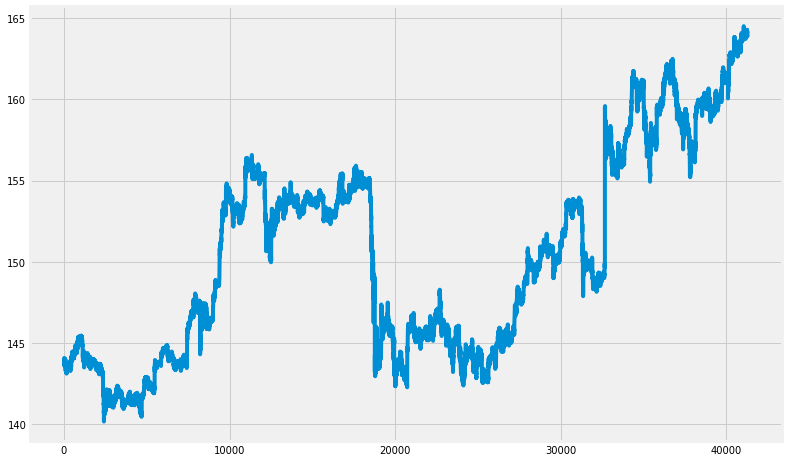

In [22]:
df["NASDAQ.AAPL"].plot(figsize=(12,8));

# plot the auot-correlation and partial auto correlation of AAPL stock

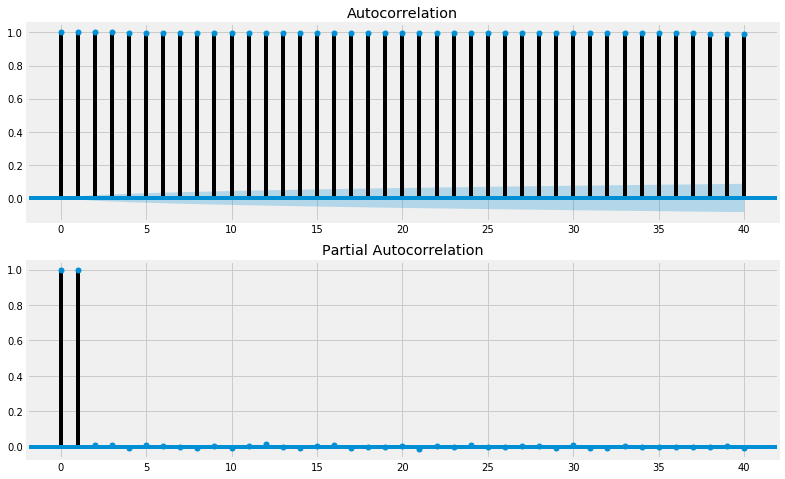

In [23]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df["NASDAQ.AAPL"].values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df["NASDAQ.AAPL"], lags=40, ax=ax2)

# Check the p,d and q value for AAPL stock with different ranges

In [24]:
arr = np.log(df["NASDAQ.AAPL"].values)
for p in range(3):
    for d in range(1,2):
        for q in range(3):
            try:
                model= ARIMA(arr,(p,d,q)).fit()
                print("model",p,d,q, model.aic, model.bic, model.hqic)
            except:
                pass

C:\Users\chinnu\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\chinnu\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\chinnu\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)

model 0 1 0 -492712.8852838061 -492695.62974388205 -492707.43140227353
model 0 1 1 -492714.54918343306 -492688.66587354697 -492706.3683611342
model 0 1 2 -492725.7039907831 -492691.192910935 -492714.79622771795
model 1 1 0 -492714.4241138648 -492688.5408039787 -492706.2432915659


C:\Users\chinnu\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\chinnu\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


model 1 1 1 -492714.93875463656 -492680.42767478846 -492704.03099157143
model 1 1 2 -492726.4035785734 -492683.26472876326 -492712.768874742
model 2 1 0 -492725.43926752417 -492690.92818767607 -492714.53150445904


C:\Users\chinnu\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


model 2 1 1 -492725.85024407005 -492682.71139425994 -492712.21554023866


# Fit the model with the minimum aic value

In [25]:
model= ARIMA(arr,(1,1,2)).fit()

# Check now the durbin watson value for resudal

In [26]:
sm.stats.durbin_watson(model.resid)

1.9998239822982193

# Predict the model value

In [27]:
pred=model.predict()

In [28]:
df["AAPL_diff"] = df["NASDAQ.AAPL"]-df["NASDAQ.AAPL"].shift(periods=-1)
df["AAPL_diff"] = df.AAPL_diff.shift(1)

# Print the MSE for the model

In [29]:
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(pred, df["AAPL_diff"][1:])))

0.09354733249669582


# 3. ADP Stock
# Run the durbin watson for ADP stock and check for co-relation

In [30]:
sm.stats.durbin_watson(df["NASDAQ.ADP"])

5.150455122531197e-07

# Plot the line graph for ADP stock

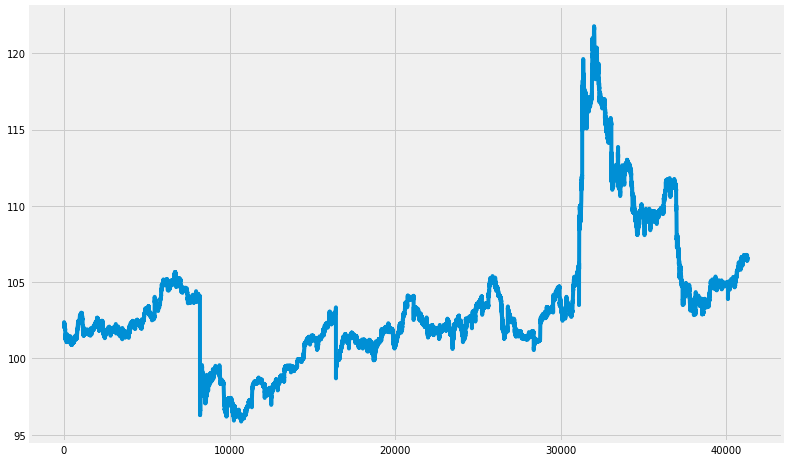

In [31]:
df["NASDAQ.ADP"].plot(figsize=(12,8));

#  plot the auot-correlation and partial auto correlation of ADP stock

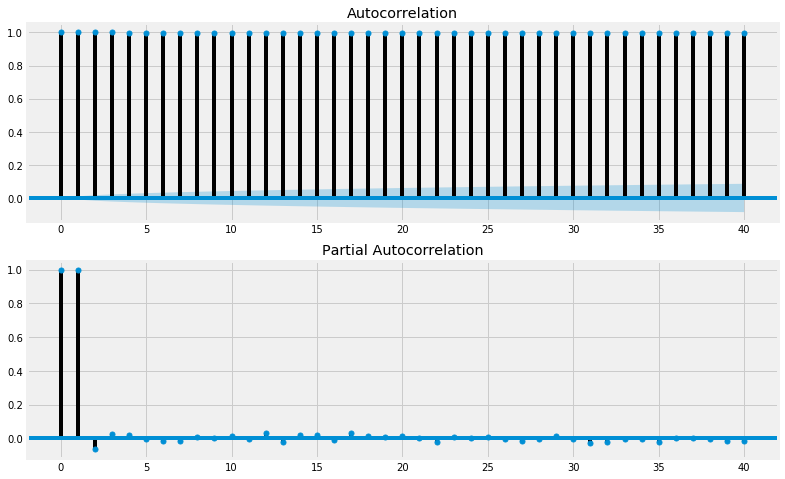

In [32]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df["NASDAQ.ADP"].values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df["NASDAQ.ADP"], lags=40, ax=ax2)

# Check the p,d and q value for ADP stock with different ranges

In [33]:
arr = np.log(df["NASDAQ.ADP"].values)
for p in range(3):
    for d in range(1,2):
        for q in range(3):
            try:
                model= ARIMA(arr,(p,d,q)).fit()
                print("model",p,d,q, model.aic, model.bic, model.hqic)
            except:
                pass

C:\Users\chinnu\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\chinnu\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\chinnu\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)

model 0 1 0 -482540.10380391026 -482522.8482639862 -482534.64992237766
model 0 1 1 -482692.3343443653 -482666.4510344792 -482684.1535220664
model 0 1 2 -482706.1151290868 -482671.60404923867 -482695.20736602164
model 1 1 0 -482685.45681778237 -482659.5735078963 -482677.2759954835
model 1 1 1 -482700.7830304231 -482666.271950575 -482689.875267358
model 1 1 2 -482714.325403183 -482671.1865533729 -482700.6906993516
model 2 1 0 -482712.0599475545 -482677.5488677064 -482701.15218448936
model 2 1 1 -482716.8786892473 -482673.7398394372 -482703.2439854159
model 2 1 2 -482725.61023966526 -482673.8436198931 -482709.24859506753


# Fit the model with the minimum aic value

In [34]:
model= ARIMA(arr,(2,1,2)).fit()

# Check now the durbin watson value for resudal

In [35]:
sm.stats.durbin_watson(model.resid)

2.0005931979774467

# Predict the model value

In [36]:
pred=model.predict()

In [37]:
df["ADP_diff"] = df["NASDAQ.ADP"]-df["NASDAQ.ADP"].shift(periods=-1)
df["ADP_diff"] = df.ADP_diff.shift(1)


# Print the MSE for the model

In [38]:
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(pred, df["ADP_diff"][1:])))

0.07433635189242371


# 4. CBOE Stock
# Run the durbin watson for CBOE stock and check for co-relation

In [39]:
sm.stats.durbin_watson(df["NASDAQ.CBOE"])

2.7113227409540525e-07

# Plot the line graph for CBOE stock

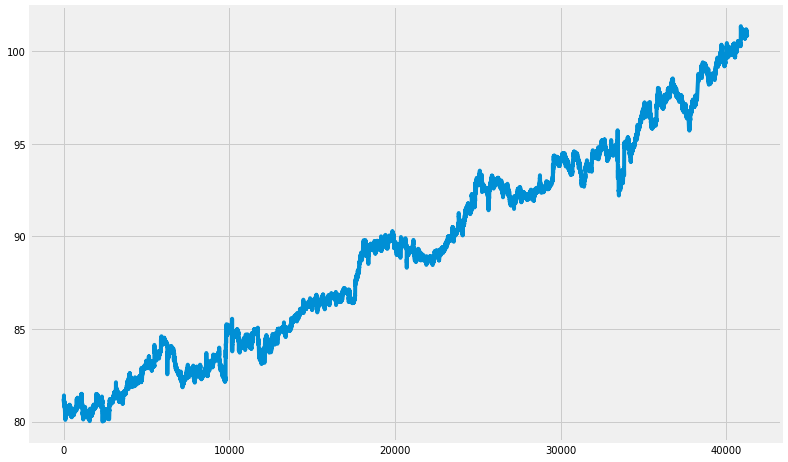

In [40]:
df["NASDAQ.CBOE"].plot(figsize=(12,8));

# plot the auot-correlation and partial auto correlation of CBOE stock

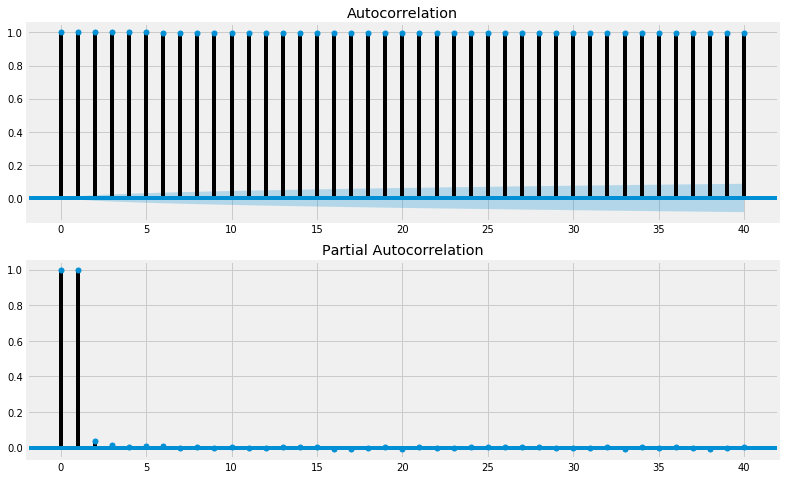

In [41]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df["NASDAQ.CBOE"].values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df["NASDAQ.CBOE"], lags=40, ax=ax2)

# Check the p,d and q value for CBOE stock with different ranges

In [42]:
arr = np.log(df["NASDAQ.CBOE"].values)
for p in range(3):
    for d in range(1,2):
        for q in range(3):
            try:
                model= ARIMA(arr,(p,d,q)).fit()
                print("model",p,d,q, model.aic, model.bic, model.hqic)
            except:
                pass

C:\Users\chinnu\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\chinnu\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\chinnu\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)

model 0 1 0 -506082.80113987776 -506065.5455999537 -506077.34725834517
model 0 1 1 -506348.622430122 -506322.7391202359 -506340.44160782313
model 0 1 2 -506439.5931454194 -506405.0820655713 -506428.68538235425
model 1 1 0 -506325.69658145064 -506299.81327156455 -506317.5157591518
model 1 1 1 -506483.0166950226 -506448.5056151745 -506472.10893195745
model 1 1 2 -506474.9035126668 -506431.7646628567 -506461.2688088354
model 2 1 0 -506421.09576052835 -506386.58468068024 -506410.1879974632
model 2 1 1 -506476.0937581118 -506432.9549083017 -506462.4590542804
model 2 1 2 -506482.3429985917 -506430.57637881953 -506465.981353994


C:\Users\chinnu\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


# Fit the model with the minimum aic value

In [43]:
model= ARIMA(arr,(1,1,1)).fit()

# Check now the durbin watson value for resudal

In [58]:
sm.stats.durbin_watson(model.resid)

1.9996882395863016

# Predict the model value

In [45]:
pred=model.predict()

In [60]:
df["CBOE_diff"] = df["NASDAQ.CBOE"]-df["NASDAQ.CBOE"].shift(periods=-1)
df["CBOE_diff"] = df.CBOE_diff.shift(1)

# Print the MSE for the model

In [61]:
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(pred, df["CBOE_diff"][1:])))

0.046607894616897357


# 5. CSCO Stock
# Run the durbin watson for CSCO stock and check for co-relation

In [62]:
sm.stats.durbin_watson(df["NASDAQ.CSCO"])

4.414266831301684e-07

# Plot the line graph for CSCO stock

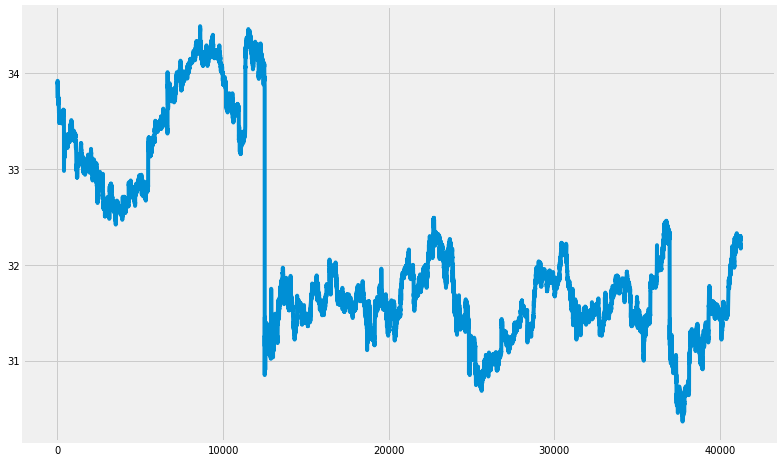

In [49]:
df["NASDAQ.CSCO"].plot(figsize=(12,8));

# plot the auot-correlation and partial auto correlation of CSCO stock

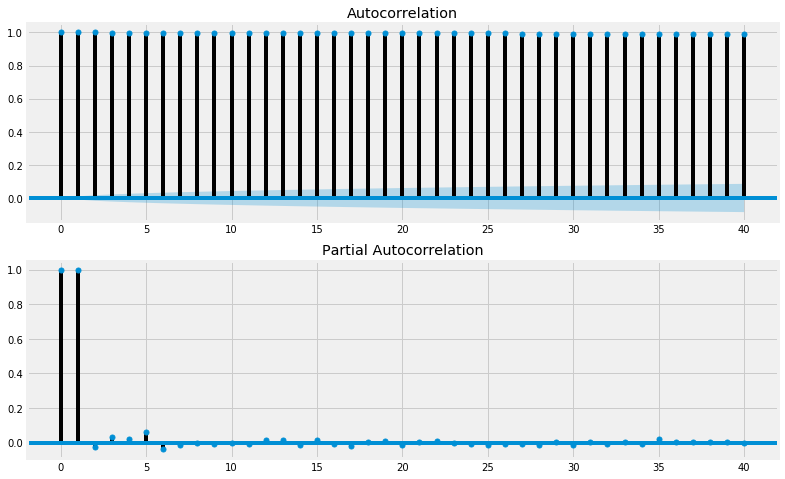

In [50]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df["NASDAQ.CSCO"].values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df["NASDAQ.CSCO"], lags=40, ax=ax2)

# Check the p,d and q value for CSCO stock with different ranges

In [51]:
arr = np.log(df["NASDAQ.CSCO"].values)
for p in range(3):
    for d in range(1,2):
        for q in range(3):
            try:
                model= ARIMA(arr,(p,d,q)).fit()
                print("model",p,d,q, model.aic, model.bic, model.hqic)
            except:
                pass

C:\Users\chinnu\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\chinnu\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\chinnu\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)

model 0 1 0 -486864.56696222967 -486847.3114223056 -486859.1130806971
model 0 1 1 -486874.0882304283 -486848.2049205422 -486865.9074081294
model 0 1 2 -486935.23343127663 -486900.7223514285 -486924.3256682115
model 1 1 0 -486873.2935201536 -486847.4102102675 -486865.11269785475


C:\Users\chinnu\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


model 1 1 1 -486874.8584519264 -486840.3473720783 -486863.95068886125


C:\Users\chinnu\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


model 1 1 2 -486934.8392227609 -486891.70037295076 -486921.2045189295
model 2 1 0 -486929.42687429825 -486894.91579445015 -486918.5191112331


C:\Users\chinnu\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


model 2 1 1 -486927.86180309975 -486884.72295328963 -486914.22709926835
model 2 1 2 -486944.9159766111 -486893.1493568389 -486928.55433201336


C:\Users\chinnu\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


# Fit the model with the minimum aic value

In [52]:
model= ARIMA(arr,(2,1,2)).fit()

C:\Users\chinnu\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


# Check now the durbin watson value for resudal

In [53]:
sm.stats.durbin_watson(model.resid)

1.9996882395863016

# Predict the model value

In [63]:
pred=model.predict()

In [55]:
df["CSCO_diff"] = df["NASDAQ.CSCO"]-df["NASDAQ.CSCO"].shift(periods=-1)
df["CSCO_diff"] = df.CSCO_diff.shift(1)

# Print the MSE for the model

In [56]:
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(pred, df["CSCO_diff"][1:])))

0.02136490494752371
